## Context

Need a short explanation of where this data came from and what the variables mean; ideally and interesting story would be best.  Then we need clearly stated research questions, so the students to know what they're being asked to do.  

- Research question(s)



In [1]:
## This cell imports modules and functions used in the rest of the notebook

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy.stats import ttest_ind as ttest2
from scipy.stats import t
import scipy.stats as stats

def groupstats(table, group, data):
    ### This function will find all the major descriptive stats you need ###
    cut = table.select(group, data).sort(group)
    favstats = cut.group(group, np.mean).sort(group)
    words = [data, 'mean']
    favstats = favstats.relabeled(' '.join(words), "mean")
    groups = favstats.column(0)
    q1=make_array()
    for i in np.arange(len(groups)):
        q1 = np.append(q1, np.percentile(table.where(group, groups.item(i)).column(data), 25))
    q3=make_array()
    for i in np.arange(len(groups)):
        q3 = np.append(q3, np.percentile(table.where(group, groups.item(i)).column(data), 75))
    favstats = favstats.with_column('std', cut.group(group, stats.tstd).sort(group).column(1) )
    favstats = favstats.with_column('min', cut.group(group, min).sort(group).column(1) )
    favstats = favstats.with_column('Q1', q1 )
    favstats = favstats.with_column('median', cut.group(group, np.median).sort(group).column(1) )
    favstats = favstats.with_column('Q3', q3 )
    favstats = favstats.with_column('max', cut.group(group, max).sort(group).column(1) )
    favstats = favstats.with_column('IQR', cut.group(group, stats.iqr).sort(group).column(1) )
    favstats = favstats.with_column('n', cut.group(group ).sort(group).column(1) )
    return favstats

penicillin = Table.read_table("Penicillin measurements.csv")

penicillin = penicillin.relabel(1, "E. coli").relabel(2, "S. epi")

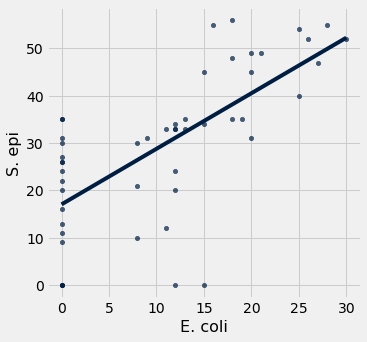

In [14]:
penicillin.where("S. epi", are.above(-1)).scatter("E. coli", "S. epi", fit_line=True)

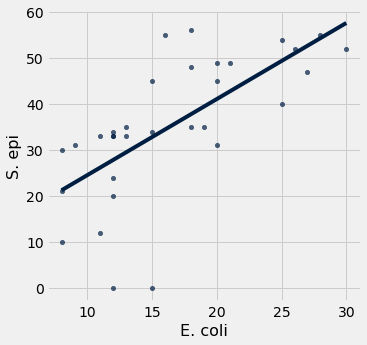

In [15]:
penicillin.where("S. epi", are.above(-1)).where("E. coli", are.above(0)).scatter("E. coli", "S. epi", fit_line=True)

In [16]:
stats.linregress(penicillin.where("S. epi", are.above(-1)).where("E. coli", are.above(0)).column(1),  penicillin.where("S. epi", are.above(-1)).where("E. coli", are.above(0)).column(2))

LinregressResult(slope=1.6523091156742309, intercept=8.029014931510371, rvalue=0.6731051712150872, pvalue=2.4294465164276897e-05, stderr=0.3314464641658869)

In [3]:
groupstats(penicillin, "Medium", "E. coli")

Medium,mean,std,min,Q1,median,Q3,max,IQR,n
AG (light blue) 5 ppm,0,0,0,0,0,0,0,0,5
AG (purple) 10 ppm,0,0,0,0,0,0,0,0,5
Ampicillin,17,2.82843,15,16,17,18,19,2,2
ER (green) 5ppm,6.4,6.0663,0,0,8,12,12,12,5
ER (yellow) 10 ppm,3.8,5.31037,0,0,0,8,11,8,5
JH (orange) 10 ppm,21,4.98569,15,18,20,21.75,30,3.75,8
JH (red) 5 ppm,21.75,4.94975,15,17.5,23,25.25,28,7.75,8
Penicillin,11.7143,1.38013,9,11.5,12,12.5,13,1,7
Water,5,6.55744,0,0,0,10,15,10,7


In [4]:
ag5 = penicillin.where("Medium", "AG (light blue) 5 ppm").column(1)
ag10 = penicillin.where("Medium", "AG (purple) 10 ppm").column(1)
ampic = penicillin.where("Medium", "Ampicillin").column(1)
er5 = penicillin.where("Medium", "ER (green) 5ppm").column(1)
er10 = penicillin.where("Medium", "ER (yellow) 10 ppm").column(1)
jh5 = penicillin.where("Medium", "JH (red) 5 ppm").column(1)
jh10 = penicillin.where("Medium", "JH (orange) 10 ppm").column(1)
penic = penicillin.where("Medium", "Penicillin").column(1)
h2o = penicillin.where("Medium", "Water").column(1)


stats.f_oneway(ag5, ag10, ampic, er5, er10, jh5, jh10, penic, h2o)

F_onewayResult(statistic=21.98872150622613, pvalue=7.369323824120212e-13)

In [5]:
stats.f_oneway(ampic, er5, er10, jh5, jh10, penic, h2o)

F_onewayResult(statistic=14.911392461954723, pvalue=2.2151301213533493e-08)

In [6]:
stats.kruskal(ampic, er5, er10, jh5, jh10, penic, h2o)

KruskalResult(statistic=32.91314770871755, pvalue=1.089711775938566e-05)

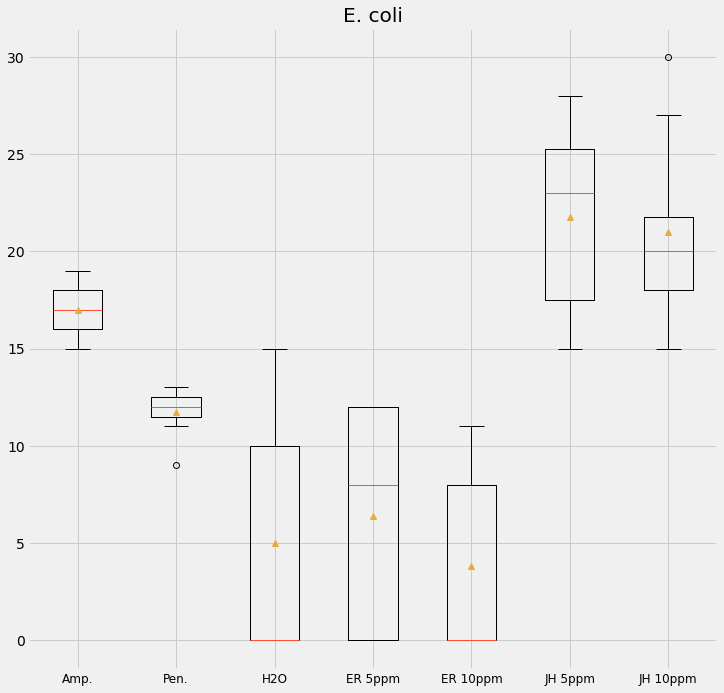

In [7]:
ticks = make_array(1,2,3,4,5,6,7)
labels = make_array("Amp.", "Pen.", "H2O", "ER 5ppm","ER 10ppm", "JH 5ppm", "JH 10ppm")

plots.figure(figsize=(11, 11))
plots.boxplot(ampic, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(penic, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.boxplot(h2o, widths=.5, positions=make_array(ticks.item(2)), showmeans=True)
plots.boxplot(er5, widths=.5, positions=make_array(ticks.item(3)), showmeans=True)
plots.boxplot(er10, widths=.5, positions=make_array(ticks.item(4)), showmeans=True)
plots.boxplot(jh5, widths=.5, positions=make_array(ticks.item(5)), showmeans=True)
plots.boxplot(jh10, widths=.5, positions=make_array(ticks.item(6)), showmeans=True)
plots.xticks(ticks, labels, size = 12)
plots.title("E. coli");

In [8]:
penicillin2 = penicillin.where("S. epi", are.above(-1))


ag5 = penicillin2.where("Medium", "AG (light blue) 5 ppm").column(2)
ag10 = penicillin2.where("Medium", "AG (purple) 10 ppm").column(2)
ampic = penicillin2.where("Medium", "Ampicillin").column(2)
er5 = penicillin2.where("Medium", "ER (green) 5ppm").column(2)
er10 = penicillin2.where("Medium", "ER (yellow) 10 ppm").column(2)
jh5 = penicillin2.where("Medium", "JH (red) 5 ppm").column(2)
jh10 = penicillin2.where("Medium", "JH (orange) 10 ppm").column(2)
penic = penicillin2.where("Medium", "Penicillin").column(2)
h2o = penicillin2.where("Medium", "Water").column(2)


stats.f_oneway(ag5, ag10, ampic, er5, er10, jh5, jh10, penic, h2o)

F_onewayResult(statistic=15.260919972619135, pvalue=5.567395109540482e-10)

In [9]:
stats.kruskal(ag5, ag10, ampic, er5, er10, jh5, jh10, penic, h2o)

KruskalResult(statistic=37.94012532995999, pvalue=7.722474551598733e-06)

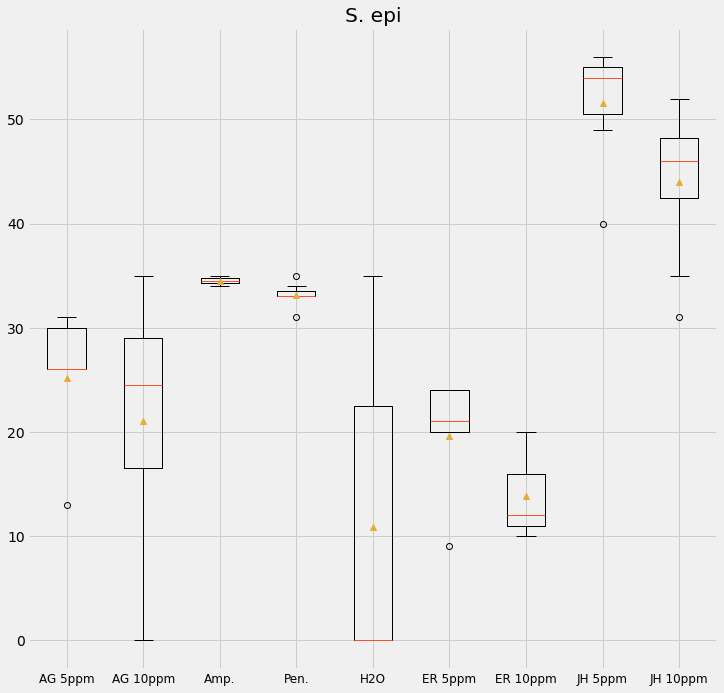

In [10]:
ticks = make_array(1,2,3,4,5,6,7,8,9)
labels = make_array("AG 5ppm", "AG 10ppm", "Amp.", "Pen.", "H2O", "ER 5ppm","ER 10ppm", "JH 5ppm", "JH 10ppm")

plots.figure(figsize=(11, 11))
plots.boxplot(ag5, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(ag10, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.boxplot(ampic, widths=.5, positions=make_array(ticks.item(2)), showmeans=True)
plots.boxplot(penic, widths=.5, positions=make_array(ticks.item(3)), showmeans=True)
plots.boxplot(h2o, widths=.5, positions=make_array(ticks.item(4)), showmeans=True)
plots.boxplot(er5, widths=.5, positions=make_array(ticks.item(5)), showmeans=True)
plots.boxplot(er10, widths=.5, positions=make_array(ticks.item(6)), showmeans=True)
plots.boxplot(jh5, widths=.5, positions=make_array(ticks.item(7)), showmeans=True)
plots.boxplot(jh10, widths=.5, positions=make_array(ticks.item(8)), showmeans=True)
plots.xticks(ticks, labels, size = 12)
plots.title("S. epi");